In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Image Shape (512, 512, 3) 
Filter Shape (3, 3)
Padded Shape (514, 514, 3)


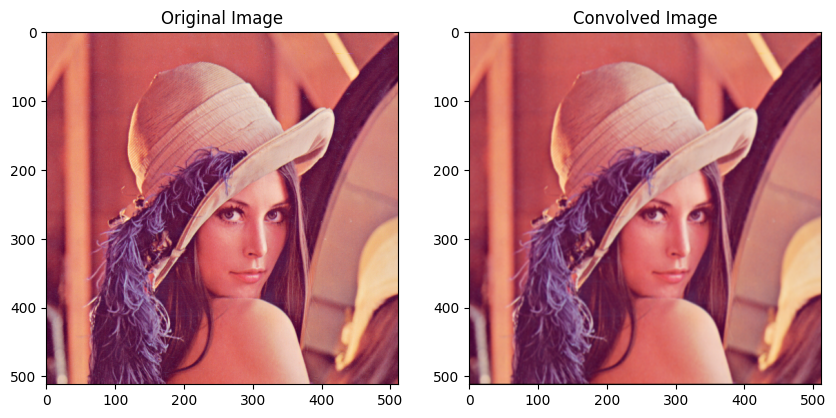

In [15]:
img = cv2.imread('/home/venk/Downloads/Lenna_(test_image).png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# filter = np.array([[0,-1,0],[-1,8,-1],[0,-1,0]])    #Sharpening filter
filter = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])  #Blurring Filter 
print(f"Image Shape",img.shape,"\nFilter Shape",filter.shape)

# Zero padding
padded_img = np.zeros((img.shape[0] + 2, img.shape[1] + 2, img.shape[2]), dtype=np.float32)
padded_img[1:-1, 1:-1, :] = img
print("Padded Shape",padded_img.shape)

convolved_img = np.zeros_like(img)

# Convolution operation
for channel in range(padded_img.shape[-1]):
    for i in range(1, padded_img.shape[0] - 1):
        for j in range(1, padded_img.shape[1] - 1):
            conv = np.zeros_like(filter)

            for k in range(conv.shape[0]):
                conv[k] = padded_img[i + k - 1, j - 1:j + 2, channel]

            result = np.sum(conv * filter)
            result = result / np.sum(filter)

            convolved_img[i - 1, j - 1, channel] = result
            

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(convolved_img)
plt.title('Convolved Image')

plt.show()